# Simulation of Marine ferromanganese crust sample

This code generates all the results presented in the subsection 3.2 Marine ferro-manganese crust sample.

Oda et al. (2011) presented an alternative cronological method based on magnetostratigraphy. As pointed out by Oda et al. (2011), the cronological methods using radiochemical and stable isotopes have limitations on the millimeter scale. The method proposed by Oda et al. (2011) uses SQUID microscopy to identify the boundaries of ultra-fine magnetic stripes (smaller than 1 mm) with approximatelly reversed magnetization. These magnetic stripes are then correlated with a standard magnetostratigraphic time scale, providing a tool for estimating ages and growth rates for hydrogenetic ferromanganese crusts with unprecedented spatial resolution.

Oda et al. (2011) applied their method to analyze a block of ferromanganese crust obtained from a seamount in the northwest Pacific Ocean. They have cut and sliced a columnar block parallel to the growth lamination at 1.5 mm intervals using a 0.3-mm-thick diamond-wire saw. After that, the bulk NRM and anhysteretic remanent magnetization (ARM) of the slices have been estimated by using a SQUID moment magnetometer.

Note that, to determine the bulk magnetization along the sample, it was necessary to slice it in small parts. In this case, it would be useful to determine the bulk magnetization along the sample by using a nondestructive method. This notebook illustrates the viability of determining the magnetization distribution along the sample by directly inverting high-resolution measurements of the magnetic induction around the sample. Results with sinthetic data produced by a rectangular sample simulating that one presented by Oda et al. (2011) show the good performance of this nondestructive method.

* Oda, H., Usui, A., Miyagi, I., Joshima, M., Weiss, B. P., Shantz, C., Fong, L. E., McBride, K. K., Harder, R. and Baudenbacher, F. J. **Ultrafine-scale magnetostratigraphy of marine ferromanganese crust**. Geology, March 2011; v. 39; no. 3; p. 227–230; doi: [10.1130/G31610.1](http://dx.doi.org/10.1130/G31610.1) 

### License

This code is licensed under under the [BSD 3-clause](http://choosealicense.com/licenses/bsd-3-clause/) license. See the file `LICENSE.md`

### Import the required dependencies

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from IPython.display import Image
from fatiando import mesher, gridder, utils
from fatiando.gravmag import prism, sphere, polyprism
from fatiando.utils import ang2vec, vec2ang
from fatiando.vis import mpl, myv
from fatiando.constants import CM, T2NT

**Fatiando a Terra version:**

commit hash: [09cd37da986114a68c57c6a611271fc6cd22bde4](https://github.com/fatiando/fatiando/tree/09cd37da986114a68c57c6a611271fc6cd22bde4)

In [3]:
mpl.rc('font', size=16)

In [4]:
#from functions import * 
import functions as f

### Intensity data

The intensity data presented below were digitized from Figure 1G presented by Oda et al. (2011).

In [5]:
#area_intensity = [0.0,50.0,0.0,15.0]

#mpl.close('all')
#axes = mpl.figure(figsize=(10,4)).add_subplot(1,1,1)

# Loading the imagem NRM_intensity.png

#img = mpl.imread('NRM_intensity.png')

#mpl.imshow(img, aspect='auto', extent=area_intensity)
#mpl.ylabel('NRM Intensity ($10^{-6} Am^{2}/kg$)')
#mpl.xlabel('Sample length ($mm$)')
#mpl.tight_layout(pad=1.7)

# This command open a window with the image and allows the points digitalization of this figure
# The figure is a figure 1F of the paper Oda et al. (2011), that contains a the intensity values
# along the sample.

#intensity = mpl.pick_points(area_intensity, axes, marker='o', color='r', size=8, xy2ne=False)

In [6]:
intensity = np.array([[  2.03610194,  14.33948864],
                      [  4.23953444,  14.53125   ],
                      [  5.66110379,   4.43181818],
                      [  6.94051621,   3.28125   ],
                      [  8.64639943,   5.58238636],
                      [ 10.21012572,   4.30397727],
                      [ 11.70277354,   7.62784091],
                      [ 12.98218596,   4.6875    ],
                      [ 14.54591225,   2.19460227],
                      [ 16.10963854,   1.55539773],
                      [ 17.46012942,   6.66903409],
                      [ 19.94787579,   2.32244318],
                      [ 21.36944514,   1.36363636],
                      [ 22.86209296,   1.55539773],
                      [ 24.35474079,   2.64204545],
                      [ 26.13170248,   3.34517045],
                      [ 27.55327183,   3.28125   ],
                      [ 28.83268425,   2.06676136],
                      [ 30.32533207,   1.55539773],
                      [ 31.74690142,   2.76988636],
                      [ 33.45278465,   3.28125   ],
                      [ 34.94543247,   3.21732955],
                      [ 36.43808029,   3.47301136],
                      [ 37.71749271,   1.81107955]])
k = 10**(-3)
m = k*intensity[:,1]

In [7]:
#Image(filename='NRM_intensity.png')

### Declination data

The declination data presented below were digitized from Figure 1D presented by Oda et al. (2011).

In [8]:
#area_declination = [0.0,50.0,-180.0,180.0]

#mpl.close('all')
#axes = mpl.figure(figsize=(10,4)).add_subplot(1,1,1)

# Loading the image declination.png

#img1 = mpl.imread('declination.png')

#mpl.imshow(img1, aspect='auto', extent=area_declination)
#mpl.ylabel('Declination (degree)')
#mpl.xlabel('Sample length ($mm$)')
#mpl.tight_layout(pad=1.7)

# This command open a window with the image and allows the points digitalization of this figure
# The figure is a figure 1D of the paper Oda et al. (2011), that contains a the declination values
# along the sample.

#d = mpl.pick_points(area_declination, axes, marker='o', color='r', size=8, xy2ne=False)

In [9]:
declination = np.array([[   1.72796617,   55.22727273],
              [   4.04803263,   61.36363636],
              [   5.57057624,  174.88636364],
              [   7.16562193, -108.92045455],
              [   8.68816555, -110.45454545],
              [   9.92070085, -116.59090909],
              [  11.44324447, -119.65909091],
              [  13.03829016,   65.96590909],
              [  14.41582962, -125.79545455],
              [  15.93837323, -139.60227273],
              [  17.38841477,  162.61363636],
              [  19.99848954, -104.31818182],
              [  21.44853108,  -81.30681818],
              [  22.97107469, -104.31818182],
              [  24.63862246, -105.85227273],
              [  25.79865569,  -98.18181818],
              [  27.24869723,   50.625     ],
              [  28.84374292, -145.73863636],
              [  30.36628653,    4.60227273],
              [  31.96133223, -124.26136364],
              [  33.41137376,   95.11363636],
              [  34.93391738,  -26.07954545],
              [  36.45646099,  -33.75      ],
              [  37.47149007,  -52.15909091]])

dec = declination[:,1]

### Inclination data

The inclination data presented below were digitized from Figure 1E presented by Oda et al. (2011).

In [10]:
#area_inclination = [0.0,50.0,-90.0,90.0]

#mpl.close('all')
#axes = mpl.figure(figsize=(10,4)).add_subplot(1,1,1)

# Loading the image inclination.png

#img2 = mpl.imread('inclination.png')

#mpl.imshow(img2, aspect='auto', extent=area_inclination)
#mpl.ylabel('Inclination (degree)')
#mpl.xlabel('Sample length ($mm$)')
#mpl.tight_layout(pad=1.7)

# This command open a window with the image and allows the points digitalization of this figure
# The figure is a figure 1E of the paper Oda et al. (2011), that contains the inclination values
# along the sample.

#i = mpl.pick_points(area_inclination, axes, marker='o', color='r', size=8, xy2ne=False)

In [11]:
inclination = np.array([[  1.81435669,  48.32386364],
              [  4.24941436,  52.92613636],
              [  5.75342057,  -7.67045455],
              [  7.32904612, -46.78977273],
              [  8.68981364, -46.02272727],
              [ 10.19381985, -47.55681818],
              [ 11.7694454,  -46.78977273],
              [ 13.05859358,  48.32386364],
              [ 14.63421913,  -0.76704545],
              [ 16.13822533,  39.11931818],
              [ 17.49899285, -12.27272727],
              [ 20.14890855, -23.77840909],
              [ 21.58129541, -28.38068182],
              [ 23.01368228, -36.05113636],
              [ 24.58930783, -46.78977273],
              [ 26.16493338, -39.88636364],
              [ 27.45408156,  52.15909091],
              [ 29.02970711, -52.15909091],
              [ 30.46209397, -59.82954545],
              [ 32.10933886, -52.15909091],
              [ 33.47010638,  60.59659091],
              [ 34.90249325,  73.63636364],
              [ 36.33488011,  11.50568182],
              [ 37.69564763, -23.01136364]])

inc = inclination[:,1]

### Synthetic sample 

The sinthetic sample simulated here is formed by 24 juxtaposed cells whose length sides are 1.5, 5.0 and 5.0 mm along the $x$, $y$ and $z$ directions, respectively. The magnetization intensity, declination and inclination values of each cell are those ones digitized from Figure 1 of Oda et al. (2011). The magnetic induction produced by this synthetic sample is calculated on four planes around the sample, at a regular grid of 200 x 100 observation points, being 200 the number of points along the $x$-axis. The distance between the planes and sample surface is 370 $\mu$m.

In [12]:
Lx = 1.5  #cell length side along x-axis in mm
Ly = 5.0  #sample length side along y-axis in mm
Lz = 5.0  #sample length side along z-axis in mm
P = 24    #number of cells forming the synthetic sample
M = 3*P   #number of parameters to be estimated by inversion
Nx = 200  #number of points along the x-axis on the planes
Ny = 100  #number of points along the y- or z-axis on the planes
shape = (Nx,Ny)
h = 370   #distance (in microns) between the planes and the sample surface
xmax = 0.001*25    # in m
ymax = 0.001*12.5  # in m
zmax = 0.001*12.5  # in m
xmin = -xmax       # in m
ymin = -ymax       # in m
zmin = -zmax       # in m
area = [xmin,xmax,ymin,ymax] # in m
volume = area + [zmin,zmax]  # in m

In [13]:
aux0 = 0.5*P*Lx
aux1 = 0.5*Lx
centers = [aux1-aux0 + i*Lx for i in range(P)]

In [14]:
print 'Total sample length along the x-axis: %.3f mm' % (P*Lx)

Total sample length along the x-axis: 36.000 mm


#### Syntetic sample model

In [15]:
model_crust = f.sample(0.001*Lx,0.001*Ly,0.001*Lz,P,m,inc,dec)

#### Observation points

The cell below generates the coordinates (in meters) of the observation points on which the magnetic induction produced by the synthetic sample is calculated. These points are located on four planes around the sample.

In [16]:
x0,y0,z0 = f.coordplane(h,1.e-3*Ly,Nx,Ny,area,0,0)
x1,y1,z1 = f.coordplane(h,1.e-3*Lz,Nx,Ny,area,1,0)
x2,y2,z2 = f.coordplane(h,1.e-3*Ly,Nx,Ny,area,2,0)
x3,y3,z3 = f.coordplane(h,1.e-3*Lz,Nx,Ny,area,3,0)

#### Boundaries of the studied area

In [17]:
print 'xmin = %7.3f cm' % (100.*volume[0])
print 'xmax = %7.3f cm' % (100.*volume[1])
print 'ymin = %7.3f cm' % (100.*volume[2])
print 'ymax = %7.3f cm' % (100.*volume[3])
print 'zmin = %7.3f cm' % (100.*volume[4])
print 'zmax = %7.3f cm' % (100.*volume[5])
print '\n'
print 'dx = %7.3f cm' % (100.*(volume[1]-volume[0])/Nx)
print 'dy = %7.3f cm' % (100.*(volume[3]-volume[2])/Ny)
print 'dz = %7.3f cm' % (100.*(volume[5]-volume[4])/Ny)

xmin =  -2.500 cm
xmax =   2.500 cm
ymin =  -1.250 cm
ymax =   1.250 cm
zmin =  -1.250 cm
zmax =   1.250 cm


dx =   0.025 cm
dy =   0.025 cm
dz =   0.025 cm


#### Magnetic induction produced by the synthetic sample

With the observation points and the synthetic model generated previously, we calculate the magnetic induction produced by the synthetic sample on the four planes.

#### Generating noise

In addition, we contaminate the data calculated above with two different noise types. The first one simulates the magnetic induction produced by 50 highly-magnetized Titanomagnetite grains within the synthetic sample. These grains are represented by randomly distributed spheres with radius equal to 30 $\mu$m and magnetization intensity of 100 A/m. The magnetization direction of these grains are randomly oriented. The second noise added to the magnetic induction calculated above simulates an intrumental error represented by a pseudo-random Gaussian noise with zero mean and standard deviation equal to 0.749 nT (10% of the maximum absolute value of magnetic induction).

In [18]:
## Strongly magnetized dipoles within the synthetic sample

model_rand,Cx,Cy,Cz = f.dipolesrand(24,40,20,0,90,90,100,1.e-6*30,1.e-3*Lx,1.e-3*Ly,1.e-3*Lz)

In [19]:
B0 = f.magnetic_data(x0, y0, z0, model_crust, 0, eff_area=(300.,300.), grains = model_rand)
B1 = f.magnetic_data(x1, y1, z1, model_crust, 1, eff_area=(300.,300.),grains = model_rand)
B2 = f.magnetic_data(x2, y2, z2, model_crust, 2, eff_area=(300.,300.),grains = model_rand)
B3 = f.magnetic_data(x3, y3, z3, model_crust, 3, eff_area=(300.,300.),grains = model_rand)

In [20]:
##### Calculating the pseudo-random Gaussian noise (nT)

np.random.seed(seed=40)

# The standard deviation of the pseudo-random Gaussian
# noise is defined as 10% of the
# maximum absolute value of magnetic induction produced
# by the synthetic sample on the four planes
std_noise = 0.10*np.max(np.abs([B0, B1, B2, B3]))
#std_noise = 0.05 # in nT

r = np.random.normal(0.0, std_noise, Nx*Ny)

print '%.3f nT' % std_noise

1.309 nT


#### Observed data vector

In [21]:
#### Noise-corrupted data (in nT) on the four planes around the synthetic sample
B0_obs = B0 + r
B1_obs = B1 + r
B2_obs = B2 + r
B3_obs = B3 + r

#### Observed data vector (in nT)
B_obs = [B0_obs,B1_obs,B2_obs,B3_obs]

### Inversion

Here we estimate the Cartesian coordinates of the magnetization vector within each cell forming the synthetic sample by inverting the observed data vector defined above. After that, we transform the estimated Cartesian coordinates into intensity, declination and inclination.

In [22]:
###### Calculating the sensibility matrices

A0 = f.sensitivity(P,x0,y0,z0,model_crust,0,eff_area=(300.,300.))
A1 = f.sensitivity(P,x1,y1,z1,model_crust,1,eff_area=(300.,300.))
A2 = f.sensitivity(P,x2,y2,z2,model_crust,2,eff_area=(300.,300.))
A3 = f.sensitivity(P,x3,y3,z3,model_crust,3,eff_area=(300.,300.))

In [23]:
A = [A0,A1,A2,A3]

In [24]:
R = np.zeros(M+1)
R[0] = 1.
R[3] = -1.
R = np.resize(R, (M-3,M))

In [25]:
###### Estimating parameters (in A/m) using the noise-corrupted data
u0 = [1.0e-10, 1.0e-10, 1.0e-10, 1.0e-10]
f0 = []
p_est = []
mag_r = []

H = np.dot(A[0].T, A[0])
if u0[0] != 0.:
    f0.append(np.trace(H)/M)
    H = H + u0[0]*f0[0]*np.dot(R.T, R)
h = np.dot(A[0].T, B_obs[0])
p_est.append(np.linalg.solve(H, h))
mag_r.append(f.parameters_sph(P,p_est[0]))

for i in range(1,4):
    H = np.dot(np.vstack(A[:i]).T, np.vstack(A[:i]))
    if u0[i] != 0.:
        f0.append(np.trace(H)/M)
        H = H + u0[i]*f0[i]*np.dot(R.T, R)
    h = np.dot(np.vstack(A[:i]).T, np.hstack(B_obs[:i]))
    p_est.append(np.linalg.solve(H, h))
    mag_r.append(f.parameters_sph(P,p_est[i]))

mag_r = np.array(mag_r)

In [26]:
###### Calculating the predicted data

B_pre = []
for i in range(4):
    B_pre.append(np.dot(A[i],p_est[3]))

##### Calculanting the residuals

r_norm = []
r_mean = []
r_std = []

for i in range(4):
    aux1,aux2,aux3 = f.residual(B_obs[i],B_pre[i])
    r_norm.append(aux1) # in uT
    r_mean.append(aux2) # in uT
    r_std.append(aux3)  # in uT

### Plotting of the observed and predicted data 

C:\Anaconda2\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


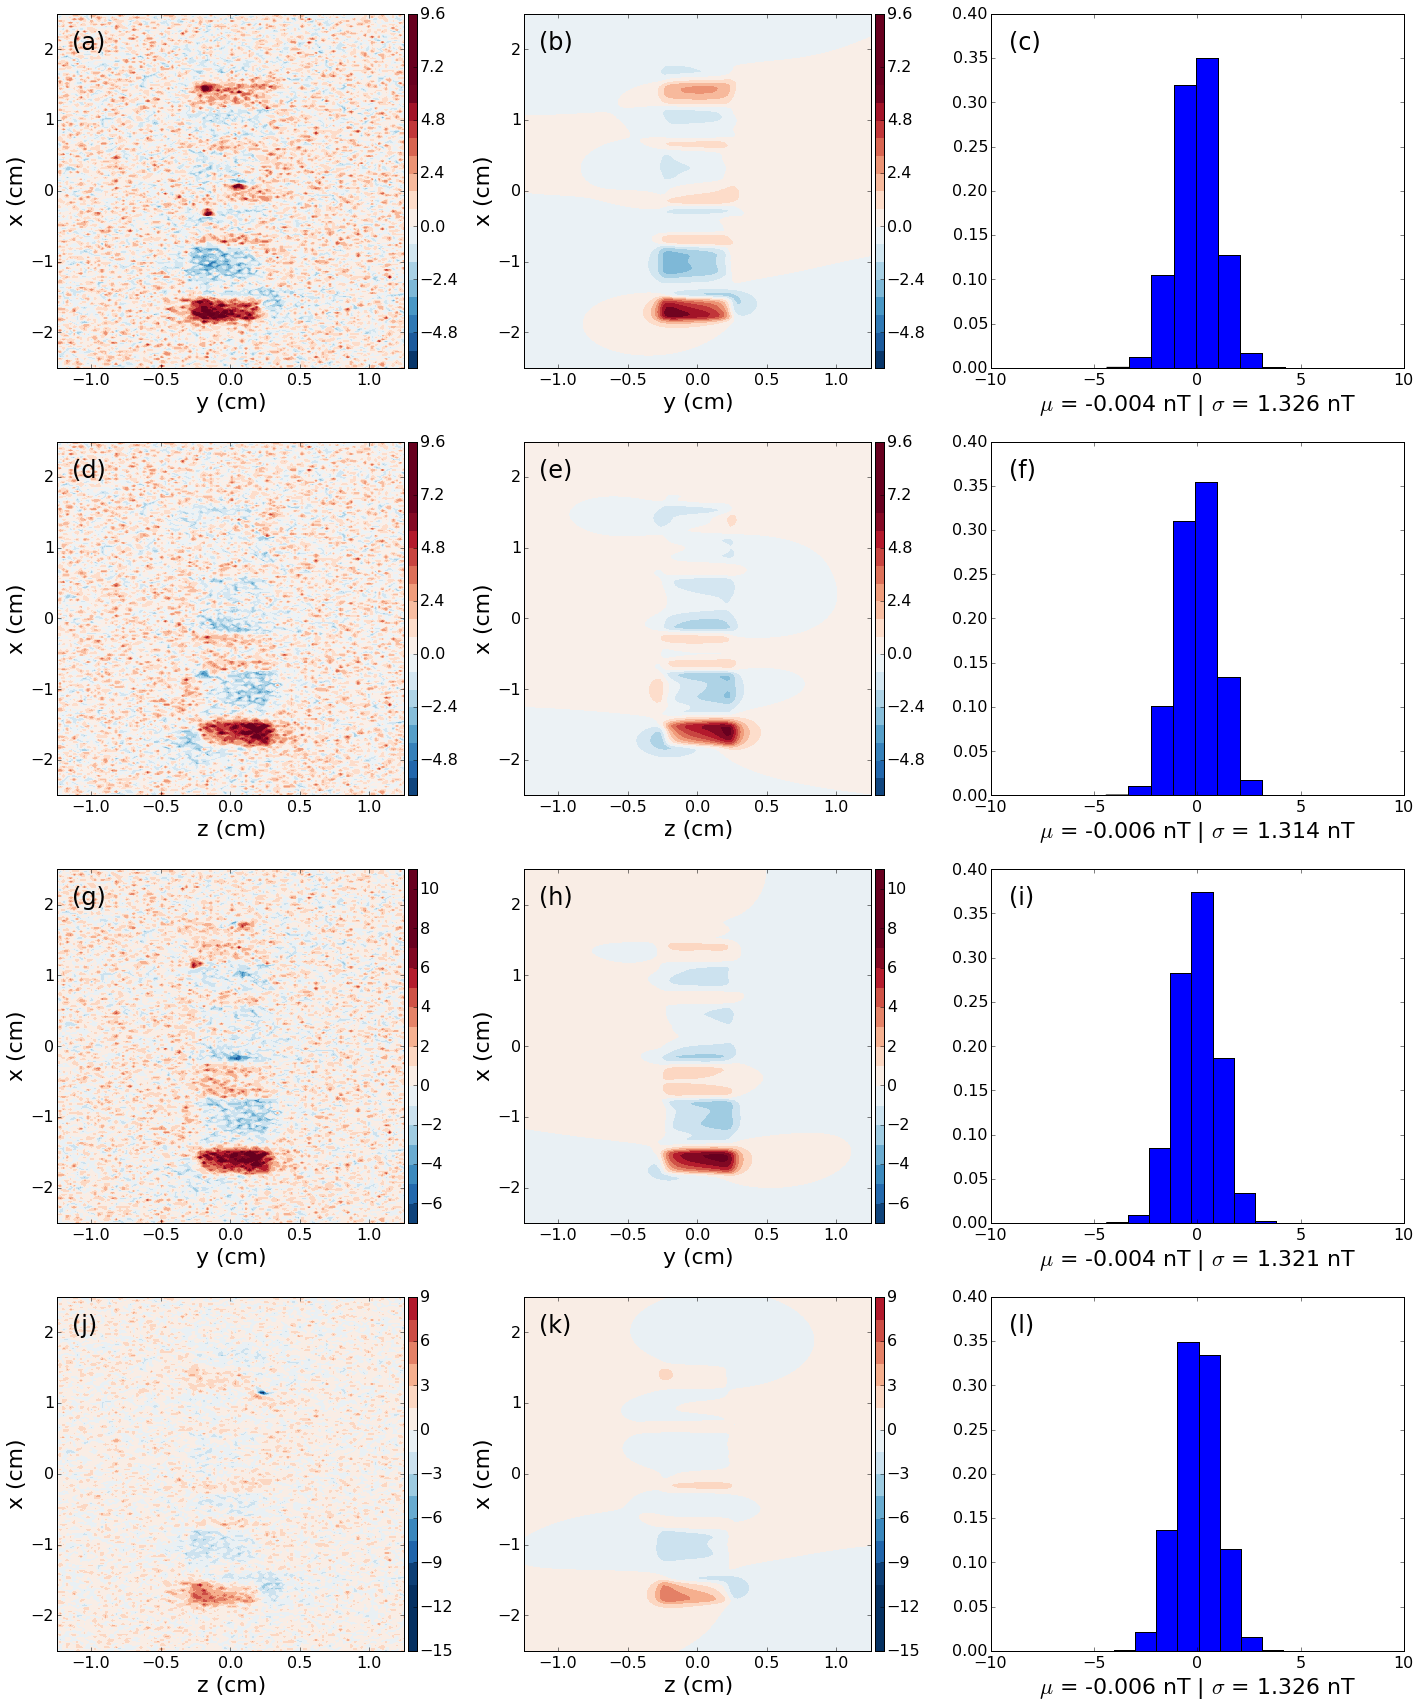

In [27]:
title_font = 22
bottom_font = 16

labels = ['(a)', '(b)', '(c)', 
          '(d)', '(e)', '(f)',
          '(g)', '(h)', '(i)',
          '(j)', '(k)', '(l)']

lables_place = (0.05, 0.90)
lables_size = 24

saturation_factor = 0.7

mpl.close('all')
mpl.figure(figsize=(20,24), tight_layout=True)

#############
ranges = saturation_factor*np.abs([B_obs[0].max(), B_obs[0].min(),
                 B_pre[0].max(),B_pre[0].min()]).max()

mpl.subplot(4,3,1)
nlevels = mpl.contourf(100.*y0, 100.*x0, B_obs[0], shape, 20, cmap=mpl.cm.RdBu_r, 
                       vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0)
mpl.xlabel('y (cm)', fontsize = title_font)
mpl.ylabel('x (cm)', fontsize = title_font)
mpl.annotate(labels[0], xy = lables_place, 
             xycoords = 'axes fraction', fontsize=lables_size)

mpl.subplot(4,3,2)
mpl.contourf(100.*y0, 100.*x0, B_pre[0], shape, nlevels, cmap=mpl.cm.RdBu_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0)
mpl.xlabel('y (cm)', fontsize = title_font)
mpl.ylabel('x (cm)', fontsize = title_font)
mpl.annotate(labels[1], xy = lables_place, 
             xycoords = 'axes fraction', fontsize=lables_size)

mpl.subplot(4,3,3)
mpl.xlabel('$\mu$ = %.3f nT | $\sigma$ = %.3f nT' % (r_mean[0], r_std[0]), fontsize = title_font)
nbins = int((np.max(r_norm[0]) - np.min(r_norm[0])))
mpl.hist(r_norm[0],bins=nbins,normed=True)
mpl.ylim(0.,0.4)
mpl.xlim(-10., 10.)
mpl.annotate(labels[2], xy = lables_place, 
             xycoords = 'axes fraction', fontsize=lables_size)


###############
ranges = saturation_factor*np.abs([B_obs[1].max(), B_obs[1].min(),
                B_pre[1].max(),B_pre[1].min()]).max()

mpl.subplot(4,3,4)
nlevels = mpl.contourf(100.*z1, 100.*x1, B_obs[1], shape, 20, cmap=mpl.cm.RdBu_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0)
mpl.xlabel('z (cm)', fontsize = title_font)
mpl.ylabel('x (cm)', fontsize = title_font)
mpl.annotate(labels[3], xy = lables_place, 
             xycoords = 'axes fraction', fontsize=lables_size)

mpl.subplot(4,3,5)
mpl.contourf(100.*z1, 100.*x1, B_pre[1], shape, nlevels, cmap=mpl.cm.RdBu_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0)
mpl.xlabel('z (cm)', fontsize = title_font)
mpl.ylabel('x (cm)', fontsize = title_font)
mpl.annotate(labels[4], xy = lables_place, 
             xycoords = 'axes fraction', fontsize=lables_size)

mpl.subplot(4,3,6)
mpl.xlabel('$\mu$ = %.3f nT | $\sigma$ = %.3f nT' % (r_mean[1], r_std[1]), fontsize = title_font)
nbins = int((np.max(r_norm[1]) - np.min(r_norm[1])))
mpl.hist(r_norm[1],bins=nbins,normed=True)
mpl.ylim(0.,0.4)
mpl.xlim(-10., 10.)
mpl.annotate(labels[5], xy = lables_place, 
             xycoords = 'axes fraction', fontsize=lables_size)

###########################
ranges = saturation_factor*np.abs([B_obs[2].max(), B_obs[2].min(),
                B_pre[2].max(),B_pre[2].min()]).max()

mpl.subplot(4,3,7)
nlevels = mpl.contourf(100.*y2, 100.*x2, B_obs[2], shape, 20, cmap=mpl.cm.RdBu_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0)
mpl.xlabel('y (cm)', fontsize = title_font)
mpl.ylabel('x (cm)', fontsize = title_font)
mpl.annotate(labels[6], xy = lables_place, 
             xycoords = 'axes fraction', fontsize=lables_size)

mpl.subplot(4,3,8)
mpl.contourf(100.*y2, 100.*x2, B_pre[2], shape, nlevels, cmap=mpl.cm.RdBu_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0)
mpl.xlabel('y (cm)', fontsize = title_font)
mpl.ylabel('x (cm)', fontsize = title_font)
mpl.annotate(labels[7], xy = lables_place, 
             xycoords = 'axes fraction', fontsize=lables_size)

mpl.subplot(4,3,9)
mpl.xlabel('$\mu$ = %.3f nT | $\sigma$ = %.3f nT' % (r_mean[2], r_std[2]), fontsize = title_font)
nbins = int((np.max(r_norm[2]) - np.min(r_norm[2])))
mpl.hist(r_norm[2],bins=nbins,normed=True)
mpl.ylim(0.,0.4)
mpl.xlim(-10., 10.)
mpl.annotate(labels[8], xy = lables_place, 
             xycoords = 'axes fraction', fontsize=lables_size)

#############################
ranges = saturation_factor*np.abs([B_obs[3].max(), B_obs[3].min(),
                B_pre[3].max(),B_pre[3].min()]).max()

mpl.subplot(4,3,10)

#mpl.title('(j)', fontsize=title_font)
nlevels = mpl.contourf(100.*z3, 100.*x3, B_obs[3], shape, 20, cmap=mpl.cm.RdBu_r,
            vmin=-ranges, vmax=ranges)
#mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0)
mpl.xlabel('z (cm)', fontsize = title_font)
mpl.ylabel('x (cm)', fontsize = title_font)
mpl.annotate(labels[9], xy = lables_place, 
             xycoords = 'axes fraction', fontsize=lables_size)

mpl.subplot(4,3,11)
mpl.contourf(100.*z3, 100.*x3, B_pre[3], shape, nlevels, cmap=mpl.cm.RdBu_r,
            vmin=-ranges, vmax=ranges)
mpl.colorbar(pad=0.01, aspect=40, shrink=1.0)
mpl.xlabel('z (cm)', fontsize = title_font)
mpl.ylabel('x (cm)', fontsize = title_font)
mpl.annotate(labels[10], xy = lables_place, 
             xycoords = 'axes fraction', fontsize=lables_size)

mpl.subplot(4,3,12)
mpl.xlabel('$\mu$ = %.3f nT | $\sigma$ = %.3f nT' % (r_mean[3], r_std[3]), fontsize = title_font)
nbins = int((np.max(r_norm[3]) - np.min(r_norm[3])))
mpl.hist(r_norm[3],bins=nbins,normed=True)
mpl.ylim(0.,0.4)
mpl.xlim(-10., 10.)
mpl.annotate(labels[11], xy = lables_place, 
             xycoords = 'axes fraction', fontsize=lables_size)


mpl.savefig('..\\manuscript\\Figs\\Fig11_HQ.eps')
mpl.savefig('..\\manuscript\\Figs\\Fig11_LQ.png')

mpl.show()

### Comparison between the true and estimated magnetization directions along the synthetic sample

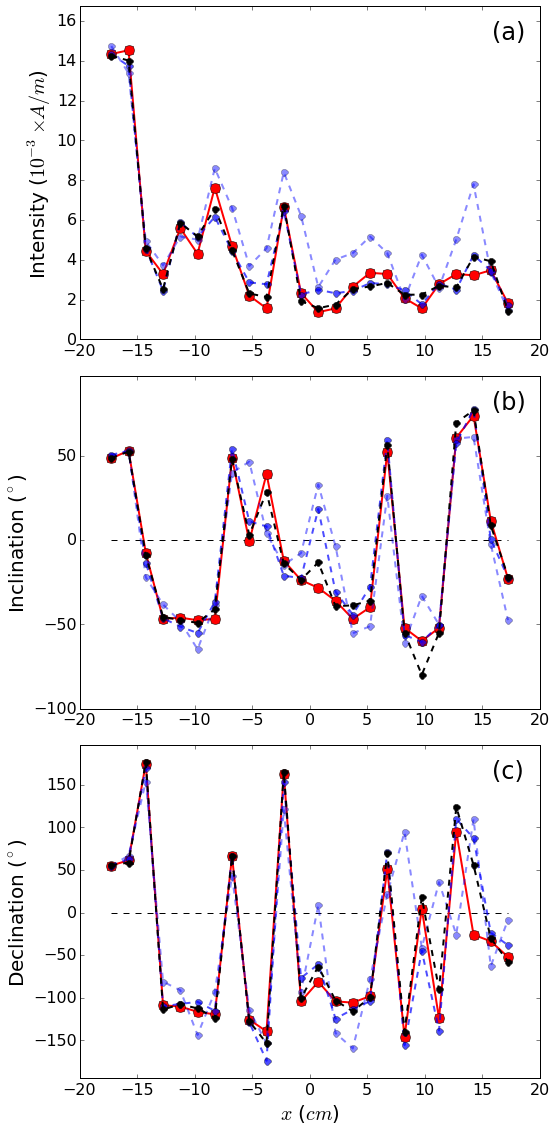

In [28]:
line_sty = ['b--', 'b--', 'b--', 'k--']
mark_sty = ['bo', 'bo', 'bo', 'ko']

label_font = 20
legend_font = 16

labels = ['(a)', '(b)', '(c)']

lables_place = (0.90, 0.90)
lables_size = 24

mpl.show()
mpl.close('all')
mpl.figure(figsize=(8, 16), tight_layout=True)

mpl.subplot(3,1,1)
mpl.plot(centers, 1000.*m, 'r-', linewidth=2)
mpl.plot(centers, 1000.*m, 'ro', markersize=10, label='True')

for i, mr in enumerate(mag_r):
    mpl.plot(centers, 1000.*mr[:,0], line_sty[i], alpha=0.1+i*0.3, linewidth=2)
    mpl.plot(centers, 1000.*mr[:,0], mark_sty[i], alpha=0.1+i*0.3, markersize=7,label='Estimated')

mpl.ylabel('Intensity ($10^{-3} \\times A/m$)', fontsize=label_font)
mpl.ylim(0., np.max(1000.*mag_r[:,:,0]) + 2.)
mpl.annotate(labels[0], xy = lables_place, 
                 xycoords = 'axes fraction', fontsize=lables_size)

mpl.subplot(3,1,2)
mpl.plot([np.min(centers), np.max(centers)], [0.0, 0.0], 'k--')
mpl.plot(centers, inc, 'r-', linewidth=2)
mpl.plot(centers, inc, 'ro', markersize=10, label='True')

for i, mr in enumerate(mag_r):
    mpl.plot(centers, mr[:,1], line_sty[i], alpha=0.1+i*0.3, linewidth=2)
    mpl.plot(centers, mr[:,1], mark_sty[i], alpha=0.1+i*0.3, markersize=7,label='Estimated')

mpl.ylabel('Inclination ($^{\circ}$)', fontsize=label_font)
mpl.ylim(np.min(mag_r[:,:,1]) - 20., np.max(mag_r[:,:,1]) + 20.)
mpl.annotate(labels[1], xy = lables_place, 
                 xycoords = 'axes fraction', fontsize=lables_size)

mpl.subplot(3,1,3)
mpl.plot([np.min(centers), np.max(centers)], [0.0, 0.0], 'k--')
mpl.plot(centers, dec, 'r-', linewidth=2)
mpl.plot(centers, dec, 'ro', markersize=10, label='True')

for i, mr in enumerate(mag_r):
    mpl.plot(centers, mr[:,2], line_sty[i], alpha=0.1+i*0.3, linewidth=2)
    mpl.plot(centers, mr[:,2], mark_sty[i], alpha=0.1+i*0.3, markersize=7,label='Estimated')

mpl.ylabel('Declination ($^{\circ}$)', fontsize=label_font)
mpl.xlabel('$x$ ($cm$)', fontsize=label_font)
mpl.ylim(np.min(mag_r[:,:,2]) - 20., np.max(mag_r[:,:,2]) + 20.)
mpl.annotate(labels[2], xy = lables_place, 
                 xycoords = 'axes fraction', fontsize=lables_size)

mpl.savefig('..\\manuscript\\Figs\\Fig12_HQ.eps')
mpl.savefig('..\\manuscript\\Figs\\Fig12_LQ.png')

mpl.show()

### Conclusions

We have simulated a rectangular rock sample with a complex magnetization distribution similar to the marine ferromanganese crust sample analyzed by Oda et. al (2011). The synthetic data produced by this synthetic sample is calculated on four planes around the sample. In order to simulate a geologically-meaningful sample, we have contaminated the synthetic data with two different noise types. The first one is a pseudo-random Gaussian noise simulating an instrumental error and the other one simulates the magnetic induction produced by highly-magnetized Titanomagnetite grains randomly distributed within the synthetic sample. The results obtained by inverting these noise-corrupted data show the good performance of our method in retrieving the spatial variability of the geologically-meaningful magnetization distribution within the synthetic sample.